<a href="https://colab.research.google.com/github/shreekrishh/Quant/blob/main/MACD/macd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')

In [1]:
#taking the data
from google.colab import files
uploaded=files.upload()

Saving GOOG.csv to GOOG.csv


In [ ]:
#store the data into a dataframe=DF
DF=pd.read_csv('GOOG.csv')
DF=DF.set_index(pd.DatetimeIndex(DF['Date'].values))
#table
DF

,Date,Open,High,Low,Close,Adj Close,Volume
2020-06-01,2020-06-01,1418.390015,1437.959961,1418.000000,1431.819946,1431.819946,1217100
2020-06-02,2020-06-02,1430.550049,1439.609985,1418.829956,1439.219971,1439.219971,1278100
2020-06-03,2020-06-03,1438.300049,1446.552002,1429.776978,1436.380005,1436.380005,1256200
2020-06-04,2020-06-04,1430.400024,1438.959961,1404.729980,1412.180054,1412.180054,1484300
2020-06-05,2020-06-05,1413.170044,1445.050049,1406.000000,1438.390015,1438.390015,1734900
...,...,...,...,...,...,...,...
2021-05-24,2021-05-24,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200
2021-05-25,2021-05-25,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900
2021-05-26,2021-05-26,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092800
2021-05-27,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010,2402.510010,1948100


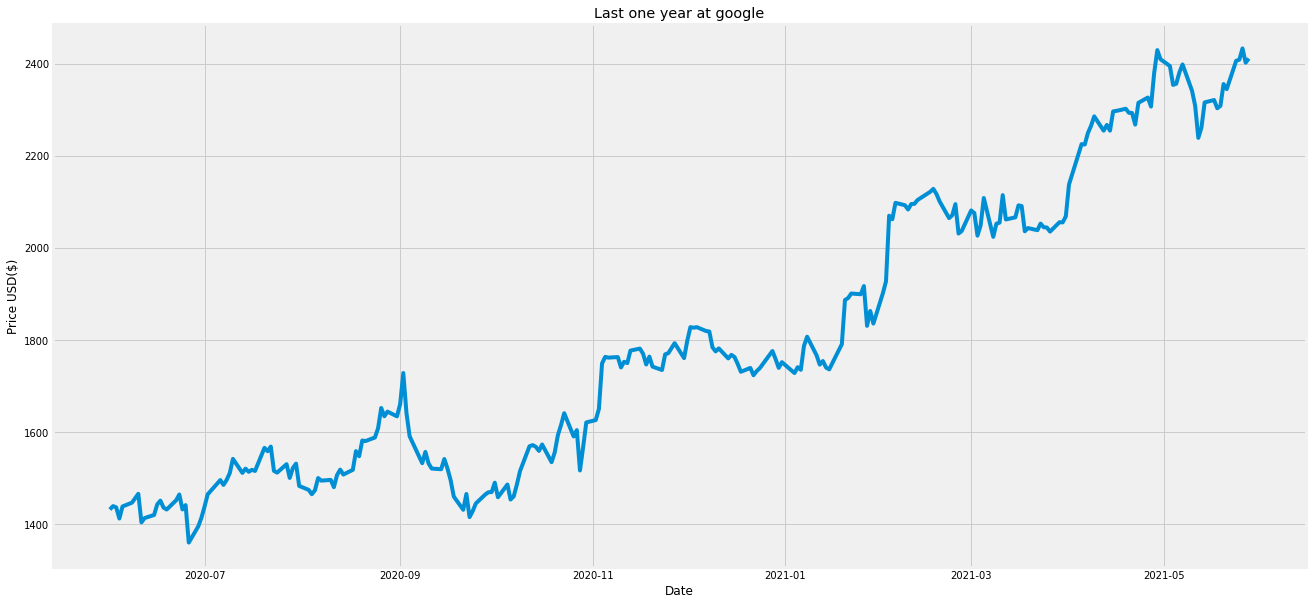

In [ ]:
#plot the stock price throughout the year
plt.figure(figsize=(20,10))
plt.plot(DF['Close'],label='Close')
plt.title('Last one year at google')
plt.ylabel('Price USD($)')
plt.xlabel('Date')
plt.show()

In [ ]:
#creating lists for MACD and signal
EMA_12_data=[]
EMA_26_data=[]
MACD=[]
signal=[]
k= 2/(13)
s= 2/(27)
t= 2/10
for i in range(11):
  EMA_12_data.append(None)
for i in range(25):
  EMA_26_data.append(None)
for i in range(25):
  MACD.append(None)
for i in range(32):
  signal.append(None)
for i in range(11,12):
  EMA_12_data.append(sum(DF['Close'][:12])/12)
for i in range(25,26):
  EMA_26_data.append(sum(DF['Close'][:26])/26)

for i in range(12, len(DF['Close'])):
  EMA_12_data.append(((DF['Close'][i])*(k))+((EMA_12_data[i-1])*(1-k)))
for i in range(26,len(DF['Close'])):
  EMA_26_data.append(((DF['Close'][i])*(s))+((EMA_26_data[i-1])*(1-s)))
for i in range(25,len(DF['Close'])):
  MACD.append(EMA_12_data[i]-EMA_26_data[i])
sum=0
for i in range(25,34):
  sum+=MACD[i]
signal.append(sum/9)
for i in range(33,len(DF['Close'])):
  signal.append((MACD[i]*t)+(MACD[i-1]*(1-t)))


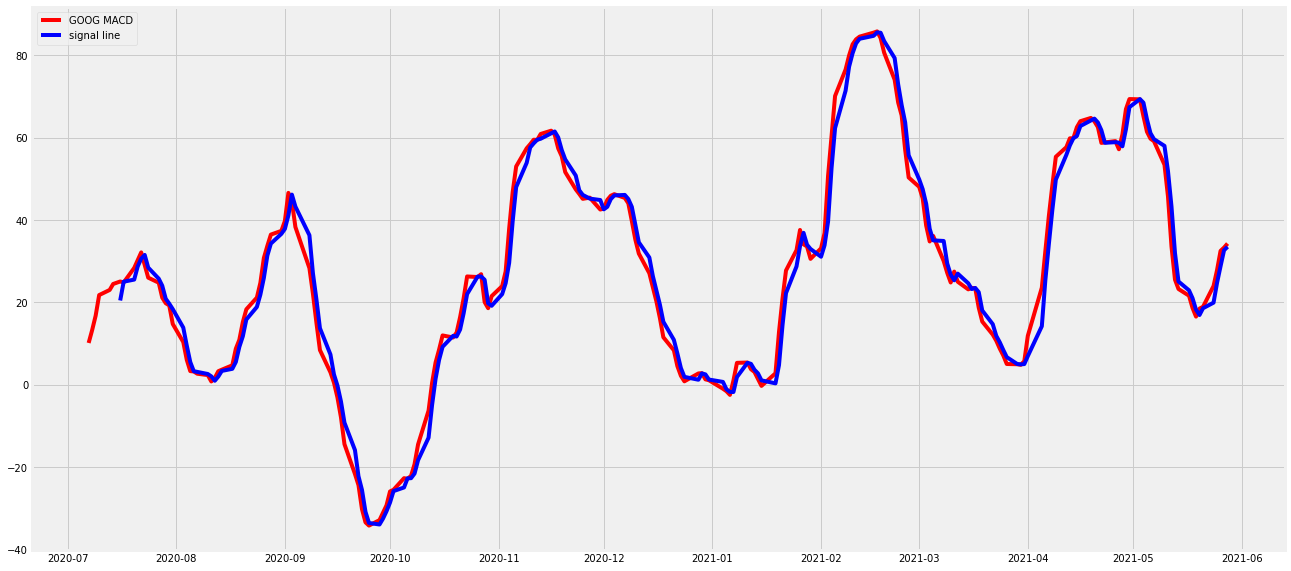

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(DF.index, MACD, label= 'GOOG MACD', color='red')
plt.plot(DF.index, signal, label= 'signal line', color='blue')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#create columns of MACD and signal
DF['MACD']=MACD
DF['signal line']=signal
#data
DF

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,signal line
2020-06-01,2020-06-01,1418.390015,1437.959961,1418.000000,1431.819946,1431.819946,1217100,NaN,NaN
2020-06-02,2020-06-02,1430.550049,1439.609985,1418.829956,1439.219971,1439.219971,1278100,NaN,NaN
2020-06-03,2020-06-03,1438.300049,1446.552002,1429.776978,1436.380005,1436.380005,1256200,NaN,NaN
2020-06-04,2020-06-04,1430.400024,1438.959961,1404.729980,1412.180054,1412.180054,1484300,NaN,NaN
2020-06-05,2020-06-05,1413.170044,1445.050049,1406.000000,1438.390015,1438.390015,1734900,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-05-24,2021-05-24,2367.000000,2418.479980,2360.110107,2406.669922,2406.669922,1062200,23.986500,19.959607
2021-05-25,2021-05-25,2420.000000,2432.889893,2402.989990,2409.070068,2409.070068,941900,27.848330,24.758866
2021-05-26,2021-05-26,2412.834961,2442.944092,2412.514893,2433.530029,2433.530029,1092800,32.507843,28.780233
2021-05-27,2021-05-27,2436.939941,2440.000000,2402.000000,2402.510010,2402.510010,1948100,33.313467,32.668968


In [ ]:
#buy? or sell? or eat a pizza? trigger
def buy_sell():
  
  buy=[]
  sell=[]
  diff=[]
  for i in range(32):
    diff.append(None)
  for i in range(32,len(DF['Close'])):
    diff.append(MACD[i]-signal[i])
  for i in range(33,len(DF['Close'])):
    if ((diff[i])*(diff[i-1]))<0 :
      if diff[i]>0:
        buy.append(i)
      else:
        sell.append(i)
  return(buy,sell)


In [ ]:
a=buy_sell()
print(a)

([34, 51, 83, 90, 99, 104, 107, 117, 126, 128, 146, 153, 160, 169, 192, 196, 199, 210, 226, 229, 245], [33, 37, 67, 89, 98, 103, 105, 116, 119, 127, 132, 148, 156, 166, 181, 193, 197, 200, 223, 228, 232])
